In [ ]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Credit_card.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


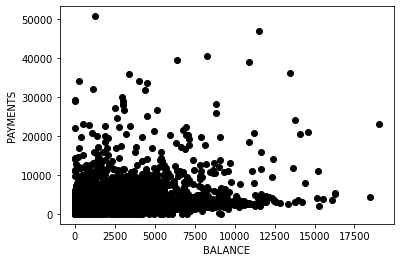

In [ ]:
X = data[["BALANCE","PAYMENTS"]]
#Visualise data points
plt.scatter(X["BALANCE"],X["PAYMENTS"],c='black')
plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')
plt.show()

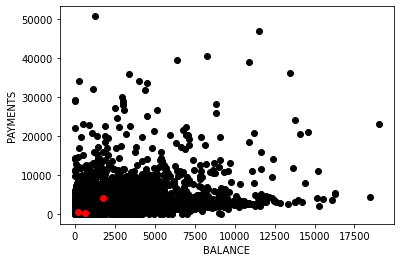

In [ ]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["BALANCE"],X["PAYMENTS"],c='black')
plt.scatter(Centroids["BALANCE"],Centroids["PAYMENTS"],c='red')
plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')
plt.show()

In [ ]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["BALANCE"]-row_d["BALANCE"])**2
            d2=(row_c["PAYMENTS"]-row_d["PAYMENTS"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["PAYMENTS","BALANCE"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['PAYMENTS'] - Centroids['PAYMENTS']).sum() + (Centroids_new['BALANCE'] - Centroids['BALANCE']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["PAYMENTS","BALANCE"]]

0.0


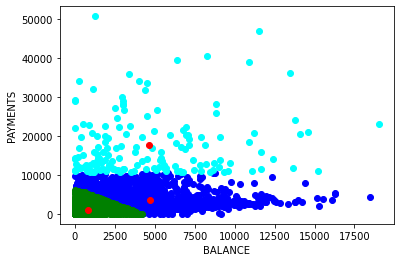

In [ ]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["BALANCE"],data["PAYMENTS"],c=color[k])
plt.scatter(Centroids["BALANCE"],Centroids["PAYMENTS"],c='red')
plt.xlabel('BALANCE')
plt.ylabel('PAYMENTS')
plt.show()